In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import tensorflow as tf
import json
from sklearn import preprocessing
from sklearn import model_selection
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score
from scikeras.wrappers import KerasRegressor
from keras.wrappers.scikit_learn import KerasClassifier
from bayes_opt import BayesianOptimization  
from Data_mining import data_mining

In [2]:
#Data mining process
#df=data_mining("ETH-USDT", "5m", "2020/04/09", "2023/08/11")
#df.to_csv("ETH-USDT_5m.csv")
#df

In [3]:
df=pd.read_csv('./ETH-USDT_5m.csv')
df=df.set_index(['time'])
df

,open,close,high,low,volume
time,,,,,
2020-04-09 00:00:00,172.20,172.12,172.34,172.07,204.24
2020-04-09 00:05:00,172.14,171.93,172.16,171.80,191.04
2020-04-09 00:10:00,171.94,172.12,172.26,171.91,200.84
2020-04-09 00:15:00,172.12,172.02,172.28,171.98,198.00
2020-04-09 00:20:00,171.99,171.87,172.10,171.72,208.17
...,...,...,...,...,...
2023-08-10 23:35:00,1849.86,1850.13,1850.13,1849.32,585.88
2023-08-10 23:40:00,1850.14,1850.67,1850.71,1850.00,443.23
2023-08-10 23:45:00,1850.67,1851.03,1851.54,1850.67,1229.89


In [4]:
pd.date_range(start='2021-01-01 00:00:00', end='2023-08-03 23:55:00').difference(df.index)

DatetimeIndex([], dtype='datetime64[ns]', freq=None)

In [5]:
df['tomorrow']=df['close'].shift(-1)
df['target']=(df['tomorrow'] > df['close']).astype(int)
df

,open,close,high,low,volume,tomorrow,target
time,,,,,,,
2020-04-09 00:00:00,172.20,172.12,172.34,172.07,204.24,171.93,0
2020-04-09 00:05:00,172.14,171.93,172.16,171.80,191.04,172.12,1
2020-04-09 00:10:00,171.94,172.12,172.26,171.91,200.84,172.02,0
2020-04-09 00:15:00,172.12,172.02,172.28,171.98,198.00,171.87,0
2020-04-09 00:20:00,171.99,171.87,172.10,171.72,208.17,171.88,1
...,...,...,...,...,...,...,...
2023-08-10 23:35:00,1849.86,1850.13,1850.13,1849.32,585.88,1850.67,1
2023-08-10 23:40:00,1850.14,1850.67,1850.71,1850.00,443.23,1851.03,1
2023-08-10 23:45:00,1850.67,1851.03,1851.54,1850.67,1229.89,1850.37,0


In [6]:
df=df.drop(df.index[-1])
del df['tomorrow']

In [7]:
df

,open,close,high,low,volume,target
time,,,,,,
2020-04-09 00:00:00,172.20,172.12,172.34,172.07,204.24,0
2020-04-09 00:05:00,172.14,171.93,172.16,171.80,191.04,1
2020-04-09 00:10:00,171.94,172.12,172.26,171.91,200.84,0
2020-04-09 00:15:00,172.12,172.02,172.28,171.98,198.00,0
2020-04-09 00:20:00,171.99,171.87,172.10,171.72,208.17,1
...,...,...,...,...,...,...
2023-08-10 23:30:00,1849.37,1849.86,1849.86,1849.32,666.97,1
2023-08-10 23:35:00,1849.86,1850.13,1850.13,1849.32,585.88,1
2023-08-10 23:40:00,1850.14,1850.67,1850.71,1850.00,443.23,1


In [8]:
dataset=df.iloc[:, 0:df.shape[1]].values
dataset.shape

(351346, 6)

In [9]:
scaler=preprocessing.MinMaxScaler(feature_range=(0, 1))
dataset_scaled=scaler.fit_transform(dataset)

In [10]:
dataset_scaled.shape

(351346, 6)

In [11]:
dataset_scaled[:, 5]

array([0., 1., 0., ..., 1., 0., 1.])

In [12]:
training_set, test_and_validation_set=model_selection.train_test_split(dataset_scaled, test_size=0.01, shuffle=False)
training_set.shape

(347832, 6)

In [13]:
test_and_validation_set.shape

(3514, 6)

In [14]:
validation_set, test_set=model_selection.train_test_split(test_and_validation_set, test_size=0.5, shuffle=False)
print(validation_set.shape)
print(test_set.shape)

(1757, 6)
(1757, 6)


In [15]:
X_train=[]
y_train=[]
for i in range(12, len(training_set)):
    X_train.append(training_set[i-12:i, :])
    y_train.append(training_set[i, 5])
X_train, y_train=np.array(X_train), np.array(y_train)

In [16]:
X_train=np.reshape(X_train, newshape=(X_train.shape[0], X_train.shape[1], df.shape[1]))
X_train.shape

(347820, 12, 6)

In [17]:
y_train.shape

(347820,)

In [18]:
X_validation=[]
y_validation=[]
for i in range(12, len(validation_set)):
    X_validation.append(validation_set[i-12:i, :])
    y_validation.append(validation_set[i, 5])
X_validation, y_validation=np.array(X_validation), np.array(y_validation)
X_validation=np.reshape(X_validation, newshape=(X_validation.shape[0], X_validation.shape[1], df.shape[1]))
X_validation.shape

(1745, 12, 6)

In [21]:
y_validation.shape

(1745,)

### LSTM Classification Model

In [31]:
#def create_lstm_model(neurons, dropout_rate):
    #model=tf.keras.Sequential()
    #model.add(tf.keras.layers.LSTM(units=neurons, return_sequences=True, input_shape=(X_validation.shape[1], X_validation.shape[2])))
    #model.add(tf.keras.layers.Dropout(rate=dropout_rate))
    #model.add(tf.keras.layers.LSTM(units=neurons, return_sequences=True))
    #model.add(tf.keras.layers.Dropout(rate=dropout_rate))
    #model.add(tf.keras.layers.LSTM(units=neurons, return_sequences=True))
    #model.add(tf.keras.layers.Dropout(rate=dropout_rate))
    #model.add(tf.keras.layers.LSTM(units=neurons, return_sequences=True))
    #model.add(tf.keras.layers.Dropout(rate=dropout_rate))
    #model.add(tf.keras.layers.LSTM(units=neurons, return_sequences=True))
    #model.add(tf.keras.layers.Dropout(rate=dropout_rate))
    #model.add(tf.keras.layers.LSTM(units=neurons, return_sequences=False))
    #model.add(tf.keras.layers.Dropout(rate=dropout_rate))
    #model.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))
    
    #return model

#neurons=[40,50,60]
#dropout_rate=[0.2, 0.3, 0.4, 0.5]
#epochs=[80,100]
#batch_size=[16,24,32]
#param_grid=dict(model__neurons=neurons, model__dropout_rate=dropout_rate, epochs=epochs, batch_size=batch_size)
#tuning_model=KerasClassifier(model=create_lstm_model, loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'], verbose=0)
#grid=model_selection.GridSearchCV(estimator=tuning_model, param_grid=param_grid, n_jobs=None, cv=3, verbose=0)
#grid_result=grid.fit(X_validation, y_validation)

In [32]:
#grid_result.best_params_

In [33]:
#grid_result.best_score_

In [34]:
#grid_results_lstm_classification=grid_result.best_params_
#grid_results_lstm_classification['best_score']=grid_result.best_score_

In [35]:
#grid_results_lstm_classification

In [36]:
#with open('./LSTM Model/LSTM Classification/GridSearch_Results_LSTM_Classification.txt', 'w') as text_file:
    #text_file.write(json.dumps(grid_results_lstm_classification))

In [37]:
with open('./LSTM Model/LSTM Classification/GridSearch_Results_LSTM_Classification.txt') as text_file:
    grid_result=text_file.read()

grid_results_lstm_classification=json.loads(grid_result)
grid_results_lstm_classification

{'batch_size': 16,
 'epochs': 80,
 'model__dropout_rate': 0.2,
 'model__neurons': 60,
 'best_score': 0.5198529626280013}

In [38]:
#def create_lstm_model_bayesian(l1_1, l1_2, l2_1, l2_2, l2_4 ,l2_3, l2_5, l2_6, dropout_rate):
    #model=tf.keras.Sequential()
    #model.add(tf.keras.layers.LSTM(units=128, return_sequences=True, kernel_regularizer=tf.keras.regularizers.L1L2(l1=l1_1, l2=l2_1), bias_regularizer=tf.keras.regularizers.L2(l2_2), activity_regularizer=tf.keras.regularizers.L2(l2_3), input_shape=(X_validation.shape[1], X_validation.shape[2])))
    #model.add(tf.keras.layers.LSTM(units=128, return_sequences=True))
    #model.add(tf.keras.layers.Dropout(rate=dropout_rate))
    #model.add(tf.keras.layers.LSTM(units=128, return_sequences=False))
    #model.add(tf.keras.layers.Dropout(rate=dropout_rate))
    #model.add(tf.keras.layers.Dense(units=1, activation='sigmoid', kernel_regularizer=tf.keras.regularizers.L1L2(l1=l1_2, l2=l2_4), bias_regularizer=tf.keras.regularizers.L2(l2_5), activity_regularizer=tf.keras.regularizers.L2(l2_6)))
    
    #model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    
    #return model

#pbounds={'l1_1':(0, 0.1), 'l1_2':(0, 0.1), 'l2_1':(0, 0.1), 'l2_2':(0, 0.1), 'l2_3':(0, 0.1), 'l2_4':(0, 0.1), 'l2_5':(0, 0.1), 'l2_6':(0, 0.1), 'dropout_rate':(0.4, 0.6)}
#model=KerasClassifier(build_fn=create_lstm_model_bayesian, epochs=100, batch_size=32)
#def optimize_lstm(l1_1, l1_2, l2_1, l2_2, l2_3, l2_4, l2_5, l2_6, dropout_rate):  
    #model.set_params(l1_1=float(l1_1), l1_2=float(l1_2), l2_1=float(l2_1), l2_2=float(l2_2), l2_3=float(l2_3), l2_4=float(l2_4), l2_5=float(l2_5), l2_6=float(l2_6), dropout_rate=float(dropout_rate))  
    #return -np.mean(sklearn.model_selection.cross_val_score(model, X_validation, y_validation, cv=3, n_jobs=None, scoring='accuracy')) 
#optimizer = BayesianOptimization(f=optimize_lstm, pbounds=pbounds, random_state=42)  
#optimizer.maximize(n_iter=20)

In [39]:
#optimizer.max['params']

In [40]:
#with open('./LSTM Model/LSTM Classification/BayesianSearch_Results_LSTM_Classification.txt', 'w') as text_file_bayes:
    #text_file_bayes.write(json.dumps(optimizer.max['params']))

In [41]:
with open('./LSTM Model/LSTM Classification/BayesianSearch_Results_LSTM_Classification.txt') as text_file:
    bayes_result=text_file.read()

bayes_results_lstm_classification=json.loads(bayes_result)
bayes_results_lstm_classification

{'dropout_rate': 0.4749080237694725,
 'l1_1': 0.09507143064099162,
 'l1_2': 0.0731993941811405,
 'l2_1': 0.05986584841970366,
 'l2_2': 0.015601864044243652,
 'l2_3': 0.015599452033620266,
 'l2_4': 0.005808361216819946,
 'l2_5': 0.08661761457749352,
 'l2_6': 0.06011150117432088}

In [51]:
lstm_model=tf.keras.Sequential()
lstm_model.add(tf.keras.layers.LSTM(units=128, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
lstm_model.add(tf.keras.layers.BatchNormalization())
lstm_model.add(tf.keras.layers.Dropout(rate=0.4))
lstm_model.add(tf.keras.layers.LSTM(units=128, return_sequences=True))
lstm_model.add(tf.keras.layers.BatchNormalization())
lstm_model.add(tf.keras.layers.Dropout(rate=0.4))
lstm_model.add(tf.keras.layers.LSTM(units=128, return_sequences=False))
lstm_model.add(tf.keras.layers.BatchNormalization())
lstm_model.add(tf.keras.layers.Dropout(rate=0.4))
lstm_model.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

lstm_model.compile(loss='binary_crossentropy', optimizer='Adam', metrics=['accuracy'])

In [52]:
lstm_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_6 (LSTM)               (None, 12, 128)           69120     
                                                                 
 batch_normalization_3 (Batc  (None, 12, 128)          512       
 hNormalization)                                                 
                                                                 
 dropout_6 (Dropout)         (None, 12, 128)           0         
                                                                 
 lstm_7 (LSTM)               (None, 12, 128)           131584    
                                                                 
 batch_normalization_4 (Batc  (None, 12, 128)          512       
 hNormalization)                                                 
                                                                 
 dropout_7 (Dropout)         (None, 12, 128)          

In [44]:
test_inputs=test_and_validation_set[len(test_and_validation_set)-len(test_set):]

In [45]:
X_test=[]
y_test=[]
for i in range(12, len(test_inputs)):
    X_test.append(test_inputs[i-12:i, :])
    y_test.append(test_inputs[i, 5])
X_test, y_test=np.array(X_test), np.array(y_test)
X_test=np.reshape(X_test, newshape=(X_test.shape[0], X_test.shape[1], df.shape[1]))
X_test.shape

(1745, 12, 6)

In [48]:
training_history=lstm_model.fit(X_train, y_train, epochs=60, batch_size=12, validation_data=(X_validation, y_validation))

Epoch 1/60
28985/28985 [==============================] - 485s 17ms/step - loss: 0.6928 - accuracy: 0.5131 - val_loss: 0.6947 - val_accuracy: 0.5083
Epoch 2/60
28985/28985 [==============================] - 494s 17ms/step - loss: 0.6928 - accuracy: 0.5133 - val_loss: 0.6936 - val_accuracy: 0.5158
Epoch 3/60
28985/28985 [==============================] - 481s 17ms/step - loss: 0.6929 - accuracy: 0.5135 - val_loss: 0.6931 - val_accuracy: 0.5066
Epoch 4/60
28985/28985 [==============================] - 475s 16ms/step - loss: 0.6932 - accuracy: 0.5069 - val_loss: 0.6926 - val_accuracy: 0.5129
Epoch 5/60
28985/28985 [==============================] - 502s 17ms/step - loss: 0.6930 - accuracy: 0.5105 - val_loss: 0.6928 - val_accuracy: 0.5117
Epoch 6/60
28985/28985 [==============================] - 474s 16ms/step - loss: 0.6929 - accuracy: 0.5126 - val_loss: 0.6940 - val_accuracy: 0.5089
Epoch 7/60
  885/28985 [..............................] - ETA: 7:43 - loss: 0.6925 - accuracy: 0.5153

KeyboardInterrupt: 

In [64]:
#training_loss_values_lstm_classification=lstm_model.history.history['loss']
#training_accuracy_values_lstm_classification=lstm_model.history.history['accuracy']
#validation_loss_values_lstm_classification=lstm_model.history.history['val_loss']
#validation_accuracy_values_lstm_classification=lstm_model.history.history['val_accuracy']

In [65]:
#lstm_model.save('./LSTM Model/LSTM Classification/LSTM_Classification_model.h5')
#lstm_model.save_weights('./LSTM Model/LSTM Classification/LSTM Classification_model_weights')
#np.savetxt('./LSTM Model/LSTM Classification/TrainingLossValues.txt', training_loss_values_lstm_classification)
#np.savetxt('./LSTM Model/LSTM Classification/TrainingAccuracyValues.txt', training_accuracy_values_lstm_classification)
#np.savetxt('./LSTM Model/LSTM Classification/ValidationLossValues.txt', validation_loss_values_lstm_classification)
#np.savetxt('./LSTM Model/LSTM Classification/ValidationAccuracyValues.txt', validation_accuracy_values_lstm_classification)

In [63]:
lstm_model_classification=tf.keras.models.load_model('./LSTM Model/LSTM Classification/LSTM_Classification_model.h5')
training_loss_values_lstm_classification=np.loadtxt('./LSTM Model/LSTM Classification/TrainingLossValues.txt')
training_accuracy_values_lstm_classification=np.loadtxt('./LSTM Model/LSTM Classification/TrainingAccuracyValues.txt')
validation_loss_values_lstm_classification=np.loadtxt('./LSTM Model/LSTM Classification/ValidationLossValues.txt')
validation_accuracy_values_lstm_classification=np.loadtxt('./LSTM Model/LSTM Classification/ValidationAccuracyValues.txt')

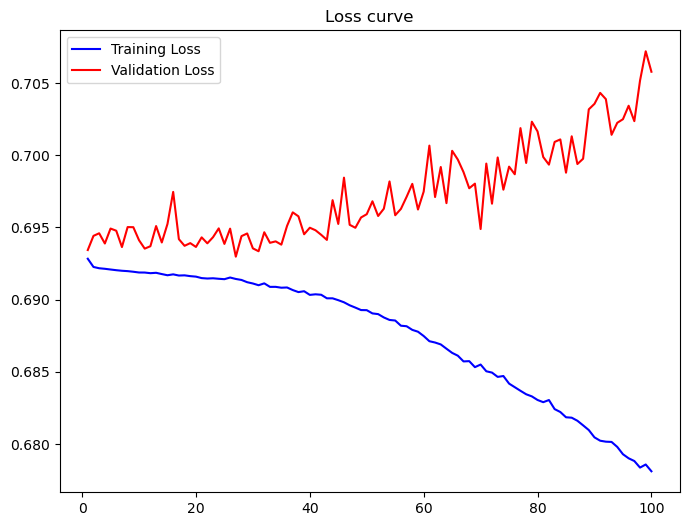

In [66]:
plt.figure(figsize=(8,6))
plt.title('Loss curve')
plt.plot(range(1,101), training_loss_values_lstm_classification, color='blue', label='Training Loss')
plt.plot(range(1,101), validation_loss_values_lstm_classification, color='red', label='Validation Loss')
plt.legend()
plt.show()

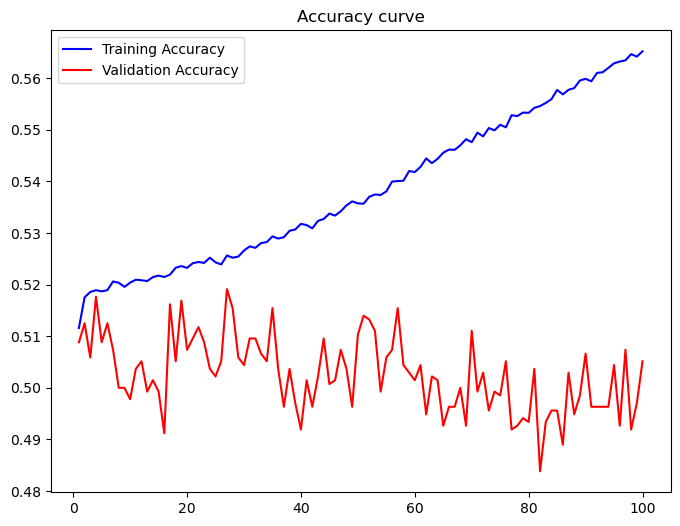

In [67]:
plt.figure(figsize=(8,6))
plt.title('Accuracy curve')
plt.plot(range(1,101), training_accuracy_values_lstm_classification, color='blue', label='Training Accuracy')
plt.plot(range(1,101), validation_accuracy_values_lstm_classification, color='red', label='Validation Accuracy')
plt.legend()
plt.show()

In [70]:
score=lstm_model_classification.evaluate(X_test, y_test)

43/43 [==============================] - 1s 10ms/step - loss: 0.7079 - accuracy: 0.4820


In [71]:
predicted_close_prices=lstm_model.predict(X_test)

43/43 [==============================] - 1s 8ms/step


In [82]:
dataset_scaled[:, 5].shape

(274458,)

In [84]:
predicted_trend=(predicted_close_prices>0.5).astype(int)
predicted_trend.shape

(1361, 1)

In [88]:
real_trend=np.reshape(dataset_scaled[-1361:, 5], newshape=(predicted_trend.shape[0], predicted_trend.shape[1]))

In [89]:
precision_score(real_trend, predicted_trend)

0.4891994917407878

### LSTM Regression Model

In [30]:
training_loss_values_lstm=np.loadtxt('./LSTM Model/TrainingLossValues.txt')
lstm_model=tf.keras.models.load_model('./LSTM Model/LSTM_model.h5')

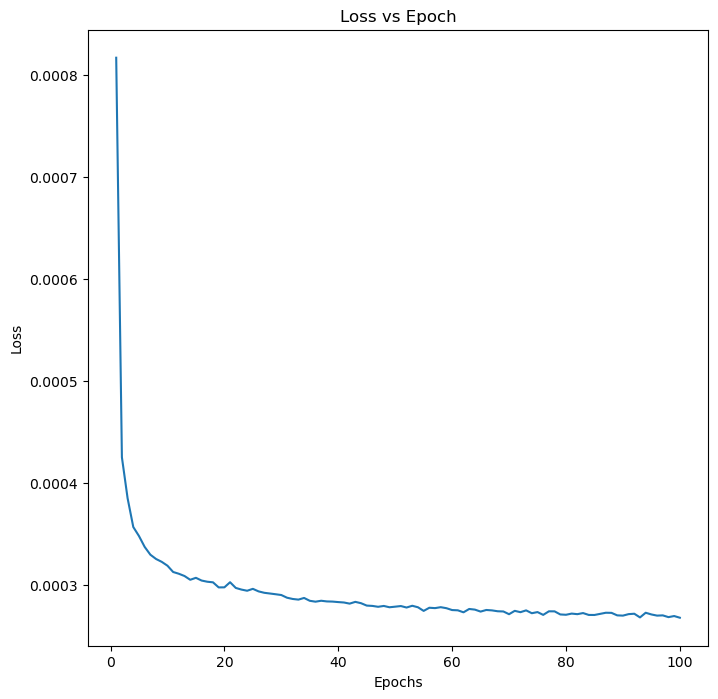

In [31]:
plt.figure(figsize=(8,8))
plt.title('Loss vs Epoch')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.plot(range(1, 101), training_loss_values_lstm)
plt.show()

In [32]:
test_inputs=test_and_validation_set[len(test_and_validation_set)-len(test_set):]
test_inputs.shape

(2745, 5)

In [33]:
X_test=[]
y_test=[]
for i in range(12, len(test_inputs)):
    X_test.append(test_inputs[i-12:i, :])
    y_test.append(test_inputs[i, 1])
    
X_test, y_test=np.array(X_test), np.array(y_test)
X_test=np.reshape(X_test, newshape=(X_test.shape[0], X_test.shape[1], X_test.shape[2]))
y_test.shape

(2733,)

In [34]:
score=lstm_model.evaluate(X_test, y_test)

86/86 [==============================] - 6s 13ms/step - loss: 1.3950e-06


In [35]:
predicted_close_prices=lstm_model.predict(X_test)

86/86 [==============================] - 3s 11ms/step


In [36]:
predicted_close_prices.shape

(2733, 1)

In [37]:
prediction_copies_array = np.repeat(predicted_close_prices,5, axis=-1)
predicted_close_prices = scaler.inverse_transform(np.reshape(prediction_copies_array,(len(predicted_close_prices),5)))[:,0]

In [38]:
y_test_copy = np.repeat(y_test,5, axis=-1)
y_test = scaler.inverse_transform(np.reshape(y_test_copy,(len(y_test),5)))[:,0]

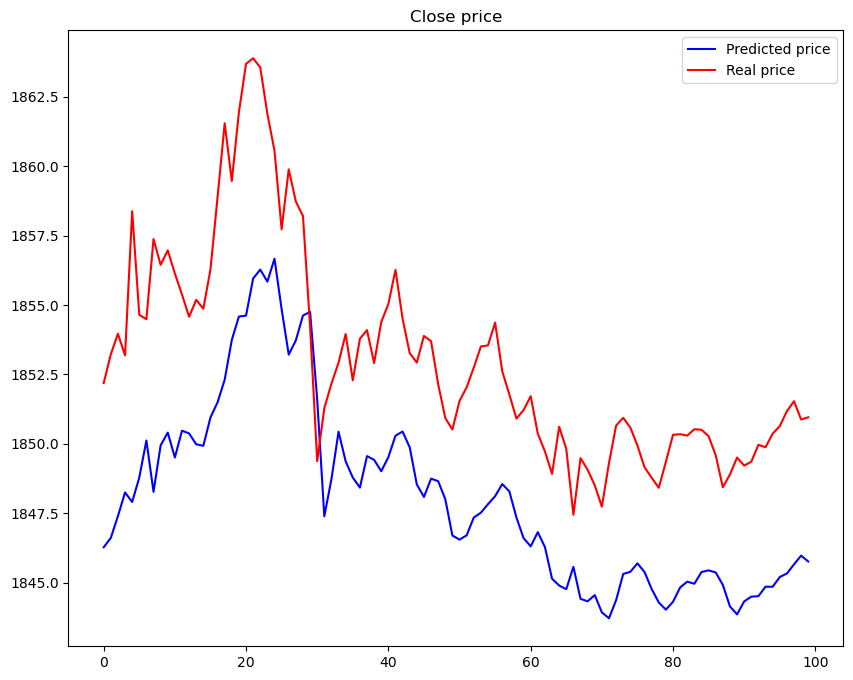

In [39]:
plt.figure(figsize=(10,8))
plt.plot(predicted_close_prices[len(predicted_close_prices)-100:len(predicted_close_prices)], color='blue', label='Predicted price')
plt.plot(y_test[len(y_test)-100:len(y_test)], color='red', label='Real price')
plt.title("Close price")
plt.legend()
plt.show()

### Building Random Forest Model

In [22]:
dataset_rf=df.copy()

In [23]:
dataset_rf['tomorrow']=dataset_rf['close'].shift(-1)

In [24]:
dataset_rf['target']=(dataset_rf['tomorrow'] > dataset_rf['close']).astype(int)

In [25]:
dataset_rf

,open,close,high,low,volume,target,tomorrow
time,,,,,,,
2020-04-09 00:00:00,172.20,172.12,172.34,172.07,204.24,0,171.93
2020-04-09 00:05:00,172.14,171.93,172.16,171.80,191.04,1,172.12
2020-04-09 00:10:00,171.94,172.12,172.26,171.91,200.84,0,172.02
2020-04-09 00:15:00,172.12,172.02,172.28,171.98,198.00,0,171.87
2020-04-09 00:20:00,171.99,171.87,172.10,171.72,208.17,1,171.88
...,...,...,...,...,...,...,...
2023-08-10 23:30:00,1849.37,1849.86,1849.86,1849.32,666.97,1,1850.13
2023-08-10 23:35:00,1849.86,1850.13,1850.13,1849.32,585.88,1,1850.67
2023-08-10 23:40:00,1850.14,1850.67,1850.71,1850.00,443.23,1,1851.03


In [26]:
randomForest_model=RandomForestClassifier(n_estimators=150, min_samples_split=100, random_state=1)

In [29]:
trainset_rf=dataset_rf.iloc[:-100]
testset_rf=dataset_rf.iloc[-100:]
predictors=['close', 'open', 'low', 'high', 'volume']

In [30]:
randomForest_model.fit(trainset_rf[predictors], trainset_rf['target'])

RandomForestClassifier(min_samples_split=100, n_estimators=150, random_state=1)

In [31]:
predictions=randomForest_model.predict(testset_rf[predictors])
predictions=pd.Series(predictions, index=testset_rf.index)

In [32]:
precision_score(testset_rf['target'], predictions)

0.47761194029850745

In [33]:
results_rf=pd.concat([testset_rf['target'], predictions], axis=1)

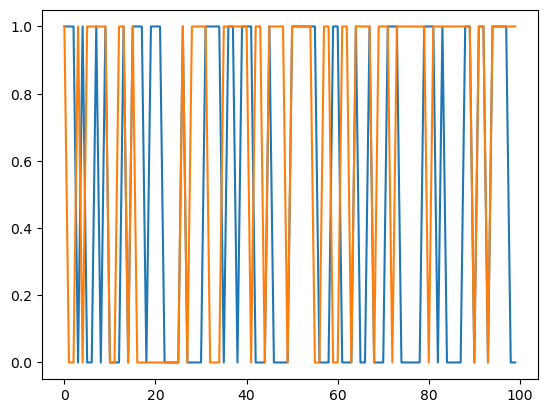

In [34]:
plt.plot(range(0,100) ,results_rf)
plt.show()

In [35]:
def predict(train, test, predictors, model):
    model.fit(train[predictors], train['target'])
    preds=model.predict(test[predictors])
    preds=pd.Series(preds, index=test.index, name="Predictions")
    combined=pd.concat([test['target'], preds], axis=1)
    return combined

In [36]:
def backtest(data, model, predictors, start=2500, step=250):
    all_predictions=[]
    
    for i in range(start, data.shape[0], step):
        train=data.iloc[0:i].copy()
        test=data.iloc[i:(i+step)].copy()
        predictions=predict(train, test, predictors, model)
        all_predictions.append(predictions)
    return pd.concat(all_predictions)